# DATASET
The main purpose of project is to do analysis on the marketing campaign (to place term deposit) conducted by Portugal bank and to see if the campaign conducted has worked or not in banks favour.The other part of the project is to see the importance of various features like job, age, marital status, education etc. on if they will place a term deposit with bank.

In [45]:
# Import all the libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline


import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
from plotly.offline import iplot
import plotly.graph_objs as go#visualization
import plotly.subplots as sp #visualization
import plotly.figure_factory as ff#visualization

In [46]:
#Load Dataset
df = pd.read_csv('Banking.csv')

In [47]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [49]:
df.isnull().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

From the above code we can see that there are no null values in dataset.

In [50]:
print(df.columns.tolist())

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


We can see that we have 21 features.

In [51]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [52]:
#brands=df.brand.value_counts()
import plotly.express as px
Different_types_employment=df.job.value_counts()
print("Different type of employement")
px.bar(data_frame=Different_types_employment)

Different type of employement


In [53]:
#labels
lab = df["marital"].value_counts().keys().tolist()
#values
val = df["marital"].value_counts().values.tolist()

trace = go.Pie(labels = lab ,
               values = val ,
               marker = dict(colors =  [ 'royalblue' ,'lime','red','yellow'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Marital status",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

data = [trace]
fig = go.Figure(data = data,layout = layout)
iplot(fig)

# Data Enconding
Now after the datapreprocessing I have encoded the categorical values in the dataset.

In [54]:
from category_encoders import OrdinalEncoder
Dict={'yes': 1,'no': 0, 'unknown':100}

#Create object for one-hot encoding
Ordinal_encoder=OrdinalEncoder(cols=['y'],return_df=True, mapping=[{'col':'y','mapping':Dict}])


#Fit & Transform
df = Ordinal_encoder.fit_transform(df)

#Encoded Data
df.head(5)



,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0


In [55]:
#Create object for one-hot encoding
Dict={'yes': 1,'no': 0, 'unknown':100}
Ordinal_encoder2=OrdinalEncoder(cols=['default'],return_df=True, mapping=[{'col':'default','mapping':Dict}])


#Fit & Transform
df = Ordinal_encoder2.fit_transform(df)

#Encoded Data
df.head(5)



,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
1,57,services,married,high.school,100,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
2,37,services,married,high.school,0,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
3,40,admin.,married,basic.6y,0,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
4,56,services,married,high.school,0,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0


In [56]:
#Create object for one-hot encoding
Dict={'yes': 1,'no': 0, 'unknown':100}
Ordinal_encoder3=OrdinalEncoder(cols=['housing'],return_df=True, mapping=[{'col':'housing','mapping':Dict}])


#Fit & Transform
df = Ordinal_encoder3.fit_transform(df)

#Encoded Data
df.head(5)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0,0,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
1,57,services,married,high.school,100,0,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
2,37,services,married,high.school,0,1,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
3,40,admin.,married,basic.6y,0,0,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
4,56,services,married,high.school,0,0,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0


In [57]:

#Create object for one-hot encoding
Dict={'yes': 1,'no': 0, 'unknown':100}
Ordinal_encoder4=OrdinalEncoder(cols=['loan'],return_df=True, mapping=[{'col':'loan','mapping':Dict}])


#Fit & Transform
df = Ordinal_encoder4.fit_transform(df)

#Encoded Data
df.head(5)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,0,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
1,57,services,married,high.school,100,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
2,37,services,married,high.school,0,1,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
3,40,admin.,married,basic.6y,0,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
4,56,services,married,high.school,0,0,1,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0


In [58]:

Dict={'divorced':1,'married':2,'single':3,'unknown':100}

#Create object for one-hot encoding
Ordinal_encoder21=OrdinalEncoder(cols=['marital'],return_df=True, mapping=[{'col':'marital','mapping':Dict}])


#Fit & Transform
df = Ordinal_encoder21.fit_transform(df)

#Encoded Data
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,2,basic.4y,0,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
1,57,services,2,high.school,100,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
2,37,services,2,high.school,0,1,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
3,40,admin.,2,basic.6y,0,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
4,56,services,2,high.school,0,0,1,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0


In [59]:
df['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

From the above job we can see that there 12 unique values in job field.

In [60]:
Dict={'housemaid':1, 'services':2, 'admin.':3, 'blue-collar':4, 'technician':5,
       'retired':6, 'management':7, 'unemployed':8, 'self-employed':9, 'unknown':100,
       'entrepreneur':11, 'student':12}

#Create object for one-hot encoding
Ordinal_encoder123=OrdinalEncoder(cols=['job'],return_df=True, mapping=[{'col':'job','mapping':Dict}])


#Fit & Transform
df = Ordinal_encoder123.fit_transform(df)

#Encoded Data
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,1,2,basic.4y,0,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
1,57,2,2,high.school,100,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
2,37,2,2,high.school,0,1,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
3,40,3,2,basic.6y,0,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
4,56,2,2,high.school,0,0,1,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0


In [61]:
df['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [62]:
Dict={'basic.4y': 1, 'high.school':2, 'basic.6y':3, 'basic.9y':4,
       'professional.course':5, 'unknown':100, 'university.degree':7,
       'illiterate':8}

#Create object for one-hot encoding
Ordinal_encoder20=OrdinalEncoder(cols=['education'],return_df=True, mapping=[{'col':'education','mapping':Dict}])


#Fit & Transform
df = Ordinal_encoder20.fit_transform(df)

#Encoded Data
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,1,2,1,0,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
1,57,2,2,2,100,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
2,37,2,2,2,0,1,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
3,40,3,2,3,0,0,0,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
4,56,2,2,2,0,0,1,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0


In [63]:
Dict={'cellular':0,'telephone':1}

#Create object for one-hot encoding
Ordinal_encoder216=OrdinalEncoder(cols=['contact'],return_df=True, mapping=[{'col':'contact','mapping':Dict}])


#Fit & Transform
df = Ordinal_encoder216.fit_transform(df)

#Encoded Data
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,1,2,1,0,0,0,1,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
1,57,2,2,2,100,0,0,1,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
2,37,2,2,2,0,1,0,1,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
3,40,3,2,3,0,0,0,1,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
4,56,2,2,2,0,0,1,1,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0


In [64]:
df['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [65]:
Dict={'may':5, 'jun':6, 'jul':7, 'aug':8, 'oct':10, 'nov':11, 'dec':12, 'mar':3, 'apr':4,
       'sep':9}

#Create object for one-hot encoding
Ordinal_encoder16=OrdinalEncoder(cols=['month'],return_df=True, mapping=[{'col':'month','mapping':Dict}])


#Fit & Transform
df = Ordinal_encoder16.fit_transform(df)

#Encoded Data
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,1,2,1,0,0,0,1,5,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
1,57,2,2,2,100,0,0,1,5,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
2,37,2,2,2,0,1,0,1,5,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
3,40,3,2,3,0,0,0,1,5,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
4,56,2,2,2,0,0,1,1,5,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0


In [66]:
df['day_of_week'].unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

In [67]:
Dict={'mon':1, 'tue':2, 'wed':3, 'thu':4, 'fri':5}

#Create object for one-hot encoding
Ordinal_encoder116=OrdinalEncoder(cols=['day_of_week'],return_df=True, mapping=[{'col':'day_of_week','mapping':Dict}])


#Fit & Transform
df = Ordinal_encoder116.fit_transform(df)

#Encoded Data
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,1,2,1,0,0,0,1,5,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
1,57,2,2,2,100,0,0,1,5,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
2,37,2,2,2,0,1,0,1,5,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
3,40,3,2,3,0,0,0,1,5,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0
4,56,2,2,2,0,0,1,1,5,1,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,0


Here, we allocated the numerical and target coloumn to a varible and also find out the categorical values.

In [68]:
target_col = ["y"]
num_col=['duration', 'campaign','pdays', 'previous', 'poutcome','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']

In [69]:
cat_cols = [x for x in df.columns if x not in num_col + target_col]
print(cat_cols)

['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week']


In [70]:
#Separating YES and NO  to marketing campaign customers

accepted= df[df["y"] == "Yes"]
rejected = df[df["y"] == "No"]

In [71]:
df['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [72]:
#labels
lab = df["y"].value_counts().keys().tolist()
#values
val = df["y"].value_counts().values.tolist()

trace = go.Pie(labels = lab ,
               values = val ,
               marker = dict(colors =  [ 'royalblue' ,'lime'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "Accepted vs. Rejected",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

data = [trace]
fig = go.Figure(data = data,layout = layout)
iplot(fig)

In [73]:
print(df['age'].unique())
print(df['job'].unique())
print(df['marital'].unique())
print(df['education'].unique())
print(df['default'].unique())
print(df['housing'].unique())
print(df['loan'].unique())
print(df['contact'].unique())
print(df['month'].unique())
print(df['day_of_week'].unique())

[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
[  1   2   3   4   5   6   7   8   9 100  11  12]
[  2   3   1 100]
[  1   2   3   4   5 100   7   8]
[  0 100   1]
[  0   1 100]
[  0   1 100]
[1 0]
[ 5  6  7  8 10 11 12  3  4  9]
[1 2 3 4 5]


In [74]:
df.dtypes

age                 int64
job                 int32
marital             int32
education           int32
default             int32
housing             int32
loan                int32
contact             int32
month               int32
day_of_week         int32
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed         int64
y                   int32
dtype: object

Checked about the coverted categorical values.

In [75]:
#correlation
correlation = df.corr()
#tick labels
matrix_cols = correlation.columns.tolist()

In [76]:
#convert to array
corr_array  = np.array(correlation)

In [77]:
#Plotting
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   colorscale = "Viridis",
                   colorbar   = dict(title = "Pearson Correlation coefficient",
                                     titleside = "right"
                                    ) ,
                  )

layout = go.Layout(dict(title = "Correlation Matrix for variables",
                        autosize = False,
                        height  = 720,
                        width   = 800,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                      ),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9))
                       )
                  )

data = [trace]
fig = go.Figure(data=data,layout=layout)
iplot(fig)

# ML Algorithm

In [78]:
df1 = df.drop(['poutcome'],axis=1)
df1 = df1.drop(['emp.var.rate'],axis=1)
df1 = df1.drop(['cons.price.idx'],axis=1)
df1 = df1.drop(['cons.conf.idx'],axis=1)
df1 = df1.drop(['euribor3m'],axis=1)
df1 = df1.drop(['pdays'],axis=1)
df1 = df1.drop(['previous'],axis=1)
df1 = df1.drop(['contact'],axis=1)
df1 = df1.drop(['campaign'],axis=1)
df1 = df1.drop(['duration'],axis=1)



In [79]:
X =df1
y=X['y']
y

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int32

In [80]:
X=X.drop(['y'], axis='columns')
X

,age,job,marital,education,default,housing,loan,month,day_of_week,nr.employed
0,56,1,2,1,0,0,0,5,1,5191
1,57,2,2,2,100,0,0,5,1,5191
2,37,2,2,2,0,1,0,5,1,5191
3,40,3,2,3,0,0,0,5,1,5191
4,56,2,2,2,0,0,1,5,1,5191
...,...,...,...,...,...,...,...,...,...,...
41183,73,6,2,5,0,1,0,11,5,4964
41184,46,4,2,5,0,0,0,11,5,4964
41185,56,6,2,7,0,1,0,11,5,4964
41186,44,5,2,5,0,0,0,11,5,4964


Dropping the target column.

# Split the dataset into train and test

In [81]:
# Import the train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

In [82]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(28831, 10)
(28831,)
(12357, 10)
(12357,)


In [83]:
# Fitting classifier to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(max_depth=5,splitter='best', criterion='entropy')
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

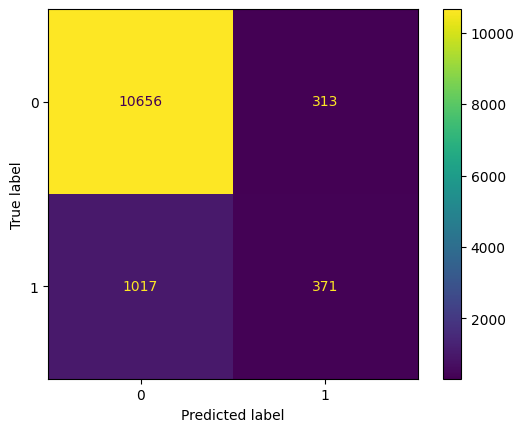

In [84]:
# Predicting the Test set results 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()
plt.show()

In [87]:
# Evaluating the results
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

print("accuracy:", accuracy_score(y_test, y_pred))
print("precision score:", precision_score(y_test, y_pred))
print("recall score:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

accuracy: 0.892368697904022
precision score: 0.5423976608187134
recall score: 0.2672910662824208
F1 Score: 0.35810810810810817


In [88]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance':classifier.feature_importances_
})

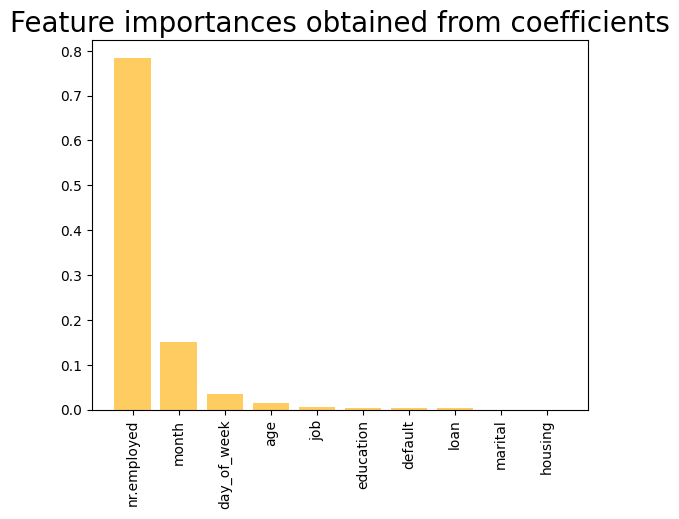

In [89]:
importances = importances.sort_values(by='Importance', ascending=False)
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#FFCC61')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [90]:
print("Feature importances:\n{}".format(classifier.feature_importances_))

Feature importances:
[0.01410654 0.0053698  0.         0.00363155 0.00317291 0.
 0.00234411 0.15092656 0.03559165 0.78485688]


In [91]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV

# TODO: Create a decision tree classifier but ONLY set the `random_state` parameter
clf = DecisionTreeClassifier(random_state=42)

# TODO: Create the parameters list you wish to tune. Use a dictionary structure:
# my_parameter_list = {'name_of_parameter': [parameter values separated by commas], 'name_of_next_parameter':[parameter values]}
parameters = {'max_depth':[1,2,3,4,5],'min_samples_leaf':[1,2,3,4,5] }

# TODO: Make an f1_score object using `make_scorer`.
from sklearn.metrics import f1_score, make_scorer
scorer = make_scorer(f1_score)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method.
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters.
grid_fit = grid_obj.fit(X_train, y_train)

# TODO: Get the estimator.
best_clf = grid_fit.best_estimator_

# Fit the new model.
best_clf.fit(X_train, y_train)

# Make predictions using the new model.
best_train_predictions = best_clf.predict(X_train)
best_test_predictions = best_clf.predict(X_test)

# Calculate the f1_score of the new model.
print('The training F1 Score is', f1_score(best_train_predictions, y_train))
print('The testing F1 Score is', f1_score(best_test_predictions, y_test))


# Let's also explore what parameters ended up being used in the new model.
best_clf

The training F1 Score is 0.31885908897403153
The testing F1 Score is 0.32399999999999995


DecisionTreeClassifier(max_depth=2, random_state=42)

In [92]:
# Fitting classifier to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier1 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier1.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

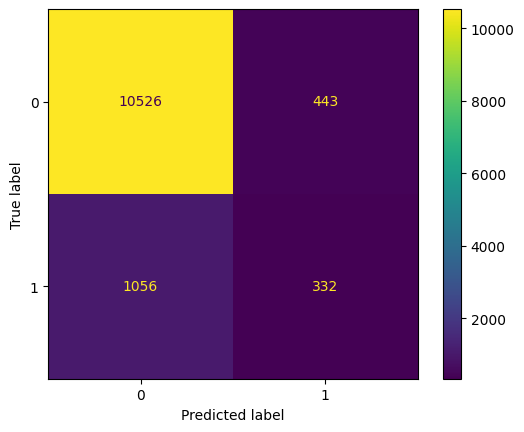

In [93]:
# Predicting the Test set results 
y_pred = classifier1.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()
plt.show()

In [94]:
# Evaluating the results
print("accuracy:", accuracy_score(y_test, y_pred))
print("precision score:", precision_score(y_test, y_pred))
print("recall score:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

accuracy: 0.8786922392166383
precision score: 0.42838709677419357
recall score: 0.23919308357348704
F1 Score: 0.3069810448451225


In [95]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance':classifier1.feature_importances_
})

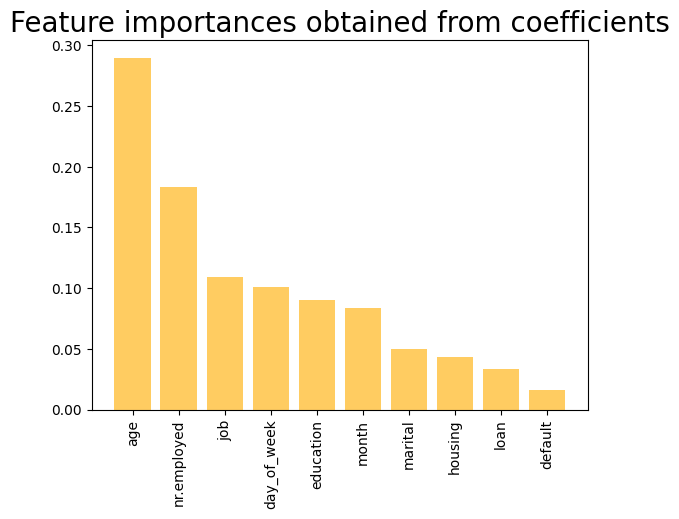

In [96]:
importances = importances.sort_values(by='Importance', ascending=False)
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#FFCC61')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

In [97]:
print("Feature importances:\n{}".format(classifier1.feature_importances_))

Feature importances:
[0.28992544 0.10910844 0.04971397 0.09040764 0.0161738  0.04325863
 0.03322876 0.08348821 0.1012605  0.18343461]


In [98]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

# TODO: Create a decision tree classifier but ONLY set the `random_state` parameter
clf = GradientBoostingClassifier(random_state=0)

# TODO: Create the parameters list you wish to tune. Use a dictionary structure:
# my_parameter_list = {'name_of_parameter': [parameter values separated by commas], 'name_of_next_parameter':[parameter values]}
parameters = {'max_depth':[1,2,3,4,5],'learning_rate':[0.0001,0.001,0.01] }

# TODO: Make an f1_score object using `make_scorer`.
from sklearn.metrics import f1_score, make_scorer
scorer = make_scorer(f1_score)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method.
grid_obj = GridSearchCV(clf, parameters, scoring=scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters.
grid_fit = grid_obj.fit(X_train, y_train)

# TODO: Get the estimator.
best_clf = grid_fit.best_estimator_

# Fit the new model.
best_clf.fit(X_train, y_train)

# Make predictions using the new model.
best_train_predictions = best_clf.predict(X_train)
best_test_predictions = best_clf.predict(X_test)

# Calculate the f1_score of the new model.
print('The training F1 Score is', f1_score(best_train_predictions, y_train))
print('The testing F1 Score is', f1_score(best_test_predictions, y_test))


# Let's also explore what parameters ended up being used in the new model.
best_clf

The training F1 Score is 0.004906470407850353
The testing F1 Score is 0.0014388489208633094


GradientBoostingClassifier(learning_rate=0.01, max_depth=5, random_state=0)

In [99]:
model_grd= GradientBoostingClassifier(random_state=0,max_depth=5,learning_rate=0.01)

model_grd.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, max_depth=5, random_state=0)

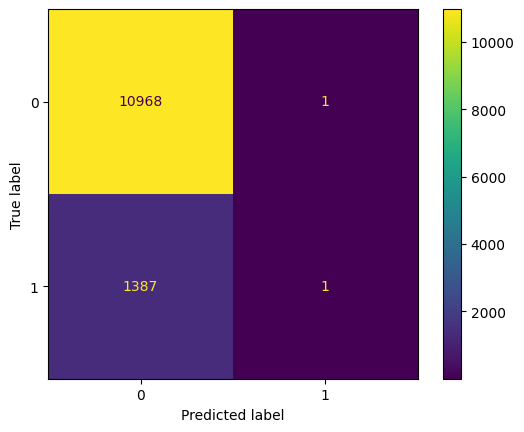

In [100]:
y_pred = model_grd.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()
plt.show()

In [101]:
# Evaluating the results
print("accuracy:", accuracy_score(y_test, y_pred))
print("precision score:", precision_score(y_test, y_pred))
print("recall score:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

accuracy: 0.8876750020231448
precision score: 0.5
recall score: 0.0007204610951008645
F1 Score: 0.0014388489208633094


In [102]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model_grd.feature_importances_
})

In [103]:
importances = importances.sort_values(by='Importance', ascending=False)

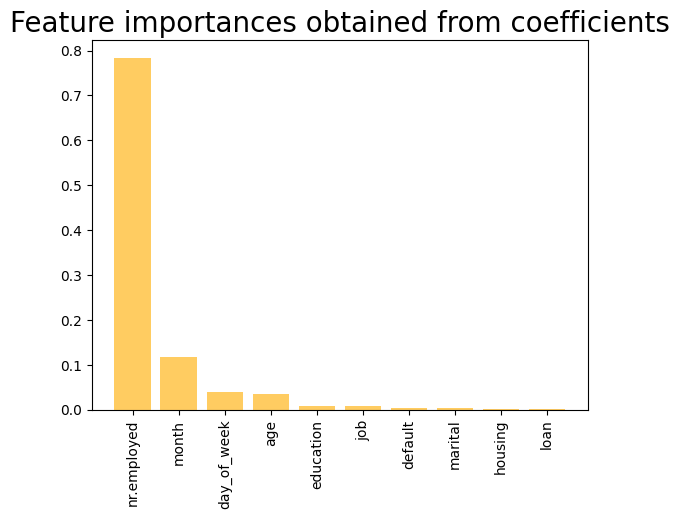

In [104]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#FFCC61')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

## Aggregated Results
  

|Model | Accuracy | Precision | Recall | F1-Score|
|:-:|:-:|:-:|:-:|:-:|
| Decision Tree |0.892368697904022|0.5423976608187134|0.2672910662824208| 0.35810810810810817|
| Random Forest |0.8786922392166383|0.42838709677419357|0.23919308357348704|0.3069810448451225|
| XG Gradient Boosting |0.8876750020231448|0.5| 0.0007204610951008645| 0.0014388489208633094|

The best model is Decision tree which gives 89% accuracy as compare to other models and
here most important features to predict the loyal customer are 'Number of day employed','Month','age'.